In [12]:
import numpy as np
import numpy
from PIL import Image
import matplotlib.pyplot as plt
import skimage
from skimage import data,io
from skimage.exposure import rescale_intensity
from skimage import measure
from random import random
from skimage.measure import compare_psnr

In [13]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = numpy.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

In [14]:
def salt_and_pepper(image, p): 
    output = np.zeros(image.shape,np.uint8) 
    thres = 1 - p 
    for i in range(image.shape[0]): 
        for j in range(image.shape[1]): 
            rdn = random() 
            if rdn < p: 
                output[i][j] = 0 
            elif rdn > thres: 
                output[i][j] = 255 
            else: 
                output[i][j] = image[i][j] 
    return output

In [18]:
def convolve(image, kernel, scale = 1):
    (iH,iW) = image.shape[:2]
    (kH,kW) = kernel.shape[:2]
    
    pad = (kW-1)//2
    output = np.zeros((iH-2*pad, iW-2*pad), dtype = "float32")
    
    for x in np.arange(pad, iH-pad):
        for y in np.arange(pad, iW-pad): 
            roi = image[x-pad:x+pad+1, y-pad:y+pad+1]
            output[x-pad,y-pad] = (roi*kernel).sum()*scale
    return output

In [19]:
gaussian_7 = np.array((
      [0,0,1,2,1,0,0],
      [0,3,13,22,13,3,0],
      [1,13,59,97,59,13,1],
      [2,22,97,159,97,22,2],
      [1,13,59,97,59,13,1],
      [0,3,13,22,13,3,0],
      [0,0,1,2,1,0,0]), dtype = "int")

In [22]:
def my_imresize(original_img, scale):
   
    inverse_scale = 1/scale
    (x,y) = original_img.shape
    (ix, iy)= (int(x*scale), int(y*scale))
    interpolated_image=np.zeros((ix, iy), dtype="uint8")

    for i in np.arange(ix-1):
        row = i*inverse_scale
        irow = int(row)
        a = row - irow
        for j in np.arange(iy-1):
            col = j*inverse_scale
            icol = int(col)
            b = col - icol
            interpolated_image[i, j] = (original_img[irow,icol]*(1-a)*(1-b) + original_img[irow,icol+1]*a*(1-b) 
                               + original_img[irow+1,icol]*(1-a)*b + original_img[irow+1,icol+1]*a*b).astype("uint8")
    return interpolated_image

In [27]:
def my_imresize(original_img, scale):
   
    inverse_scale = 1/scale
    (x,y) = original_img.shape
    (ix, iy)= (int(x*scale), int(y*scale))
    interpolated_image=np.zeros((ix, iy), dtype="uint8")

    for i in np.arange(ix-1):
        row = i*inverse_scale
        irow = int(row)
        a = row - irow
        for j in np.arange(iy-1):
            col = j*inverse_scale
            icol = int(col)
            b = col - icol
            interpolated_image[i, j] = (original_img[irow,icol]*(1-a)*(1-b) + original_img[irow,icol+1]*a*(1-b) 
                               + original_img[irow+1,icol]*(1-a)*b + original_img[irow+1,icol+1]*a*b).astype("uint8")
    return interpolated_image

## 문제5
pepper_noise.bmp 파일에 대해 위의 1, 2, 4번 문제를 반복하세요.

: 원본 이미지는 아래와 같다

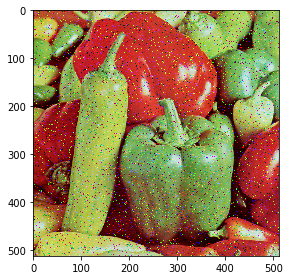

In [15]:
pepper_noise = io.imread("pepper_noise.bmp")
io.imshow(pepper_noise)
plt.show()

### 원본 이미지에 salt&pepper 즉 노이즈를 추가하여보자

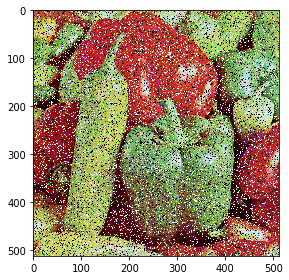

In [16]:
noise_img = salt_and_pepper(pepper_noise,0.1)
io.imshow(noise_img)
plt.show()

## noise removal sol1. median filter
median_filter를 통해 noise를 제거해보자

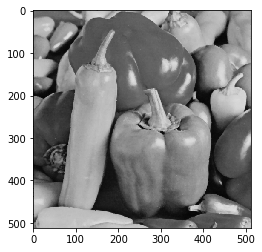

In [17]:
img = Image.open("pepper_noise.bmp").convert("L")
arr = numpy.array(img)
removed_noise = median_filter(arr, 3) 
median_img = Image.fromarray(removed_noise)
plt.imshow(median_img)
plt.show()

## noise removal sol2. gaussian filter
convolve function 을 아래와 같이 정의하고, gaussian filter를 사용하여 노이즈를 제거해보자

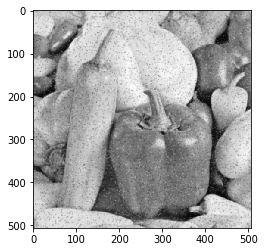

In [20]:
gaussian_img = convolve(pepper_noise[:,:,0], gaussian_7, scale = 1/1003)
plt.imshow(gaussian_img, cmap = plt.cm.gray)
plt.show()

## 문제2.
다음의 형식으로 세 개의 영상을 display 하세요. (subplot 명령어 사용)  
(원본 이미지 , noise 이미지, filtering 된 이미지 순으로세 개의 이미지가 서로 비교 가능하게 display)

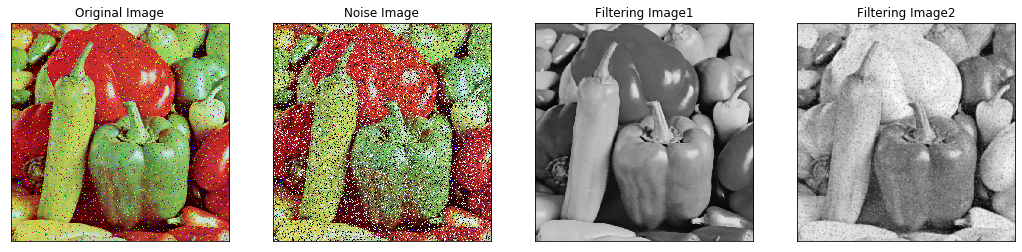

In [21]:
plt.figure(figsize=(18,15))
plt.subplot(1,4,1)
plt.imshow(pepper_noise),plt.title('Original Image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,4,2)
plt.imshow(noise_img),plt.title('Noise Image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,4,3)
plt.imshow(median_img,cmap = plt.cm.gray),plt.title('Filtering Image1')
plt.xticks([]),plt.yticks([])
plt.subplot(1,4,4)
plt.imshow(gaussian_img,cmap = plt.cm.gray),plt.title('Filtering Image2')
plt.xticks([]),plt.yticks([])
plt.show()

## 문제4
skimage.measure.compare_psnr 을 사용하여 원본 이미지- noise image의 PSNR 및 원본 이미지 filtering된 image의 PSRN 을 각각 구하세요.

: 각 이미지들의 사이즈를 확인해보자. my_imresize함수를 통해 네개의 이미지를 (512,512)로 사이즈 조정

In [29]:
print(pepper_noise.shape, noise_img.shape, arr.shape, gaussian_img.shape)

(512, 512, 3) (512, 512, 3) (512, 512) (506, 506)


In [28]:
interpolated_image = my_imresize(gaussian_img,1.013)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  if __name__ == '__main__':
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/skimage/measure/simple_metrics.py:65: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  return peak_signal_noise_ratio(im_true, im_test, data_range=data_range)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.me

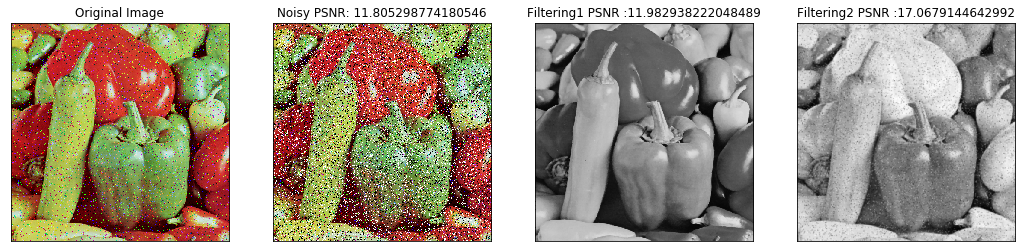

In [31]:
plt.figure(figsize=(18,15))
plt.subplot(1,4,1)
plt.imshow(pepper_noise),plt.title('Original Image')
plt.xticks([]),plt.yticks([])
plt.subplot(1,4,2)
plt.imshow(noise_img),plt.title('Noisy PSNR: '+ str(compare_psnr(airplane_img, noise_img)))
plt.xticks([]),plt.yticks([])
plt.subplot(1,4,3)
plt.imshow(median_img,cmap = plt.cm.gray),plt.title('Filtering1 PSNR :'+ str(compare_psnr(airplane_img[:,:,0],removed_noise)))
plt.xticks([]),plt.yticks([])
plt.subplot(1,4,4)
plt.imshow(gaussian_img,cmap = plt.cm.gray)
plt.title('Filtering2 PSNR :'+ str(compare_psnr(airplane_img[:,:,0],interpolated_image)))
plt.xticks([]),plt.yticks([])
plt.show()